Сгенерируем данные

In [1]:
!kkmeans_gen > example.csv
!kkmeans_gen 200 > stars.csv

Кластеризуем

In [2]:
!cat example.csv | kkmeans 3 > example.cluster.3.csv
!cat example.csv | kkmeans 5 > example.cluster.5.csv
!cat example.csv | kkmeans 7 > example.cluster.7.csv
!cat stars.csv | kkmeans 3 > stars.cluster.3.csv
!cat stars.csv | kkmeans 5 > stars.cluster.5.csv
!cat stars.csv | kkmeans 7 > stars.cluster.7.csv

Поиграемся с данными

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('stars.cluster.3.csv',sep=';',header=None,names=['X','Y','Cluster'])
data.head()

,X,Y,Cluster
0,-0.947559,25.5608,cluster1
1,-13.387400,92.3961,cluster1
2,52.693500,17.8815,cluster2
3,96.057900,84.0239,cluster1
4,48.569700,48.8757,cluster1


Приведем номер кластера в числовой вид

In [4]:
data.Cluster=data.Cluster.str.slice(7).astype(int)
data.head()

,X,Y,Cluster
0,-0.947559,25.5608,1
1,-13.387400,92.3961,1
2,52.693500,17.8815,2
3,96.057900,84.0239,1
4,48.569700,48.8757,1


Построим диаграмму

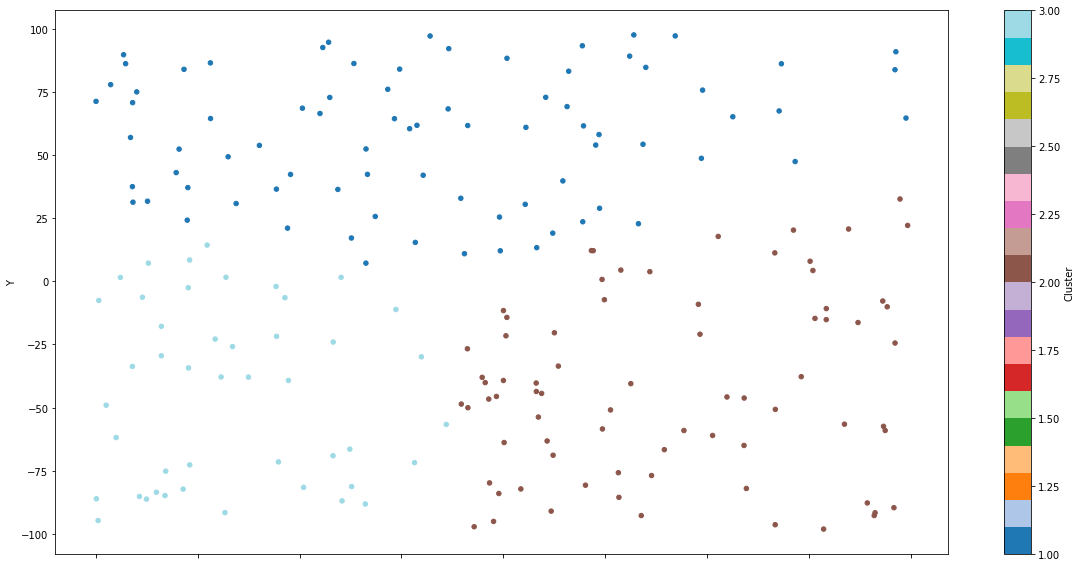

In [5]:
data.plot.scatter("X","Y",c="Cluster",cmap='tab20',figsize=(20,10));
plt.show();

Соберем все в одну кучу

In [6]:
def plot(fileName):
    data = pd.read_csv(fileName,sep=';',header=None,names=['X','Y','Cluster'])
    data.Cluster=data.Cluster.str.slice(7).astype(int)
    data.plot.scatter("X","Y",c="Cluster",cmap='tab20',figsize=(20,10),title=fileName);
    plt.show();

Посмотри что получилось

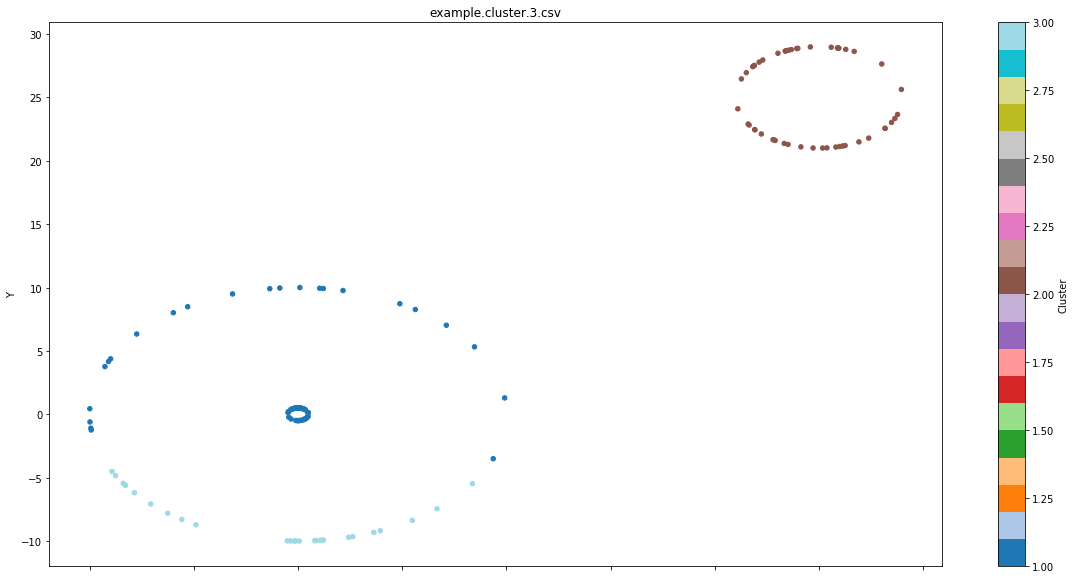

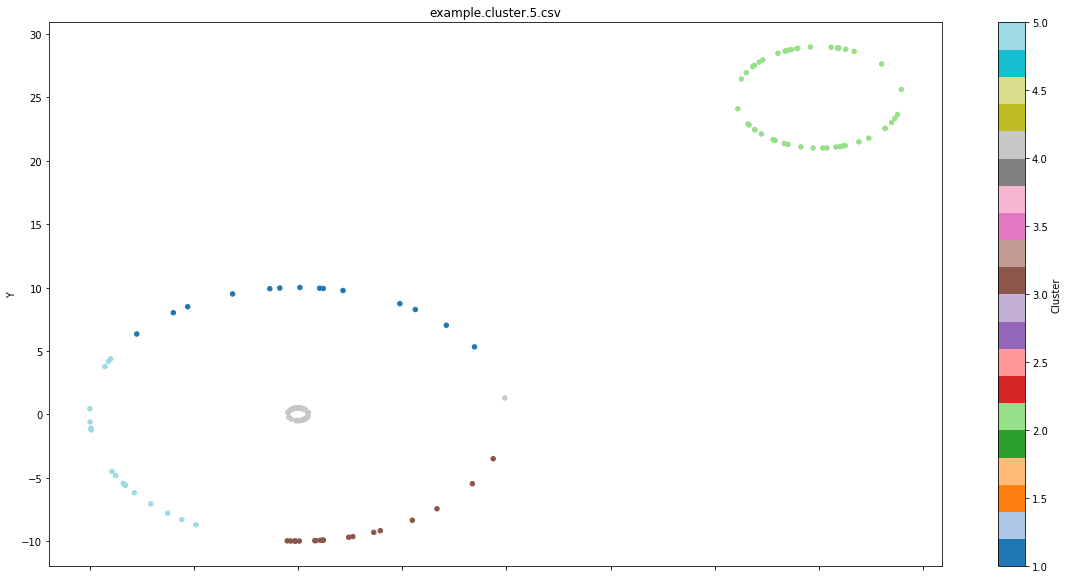

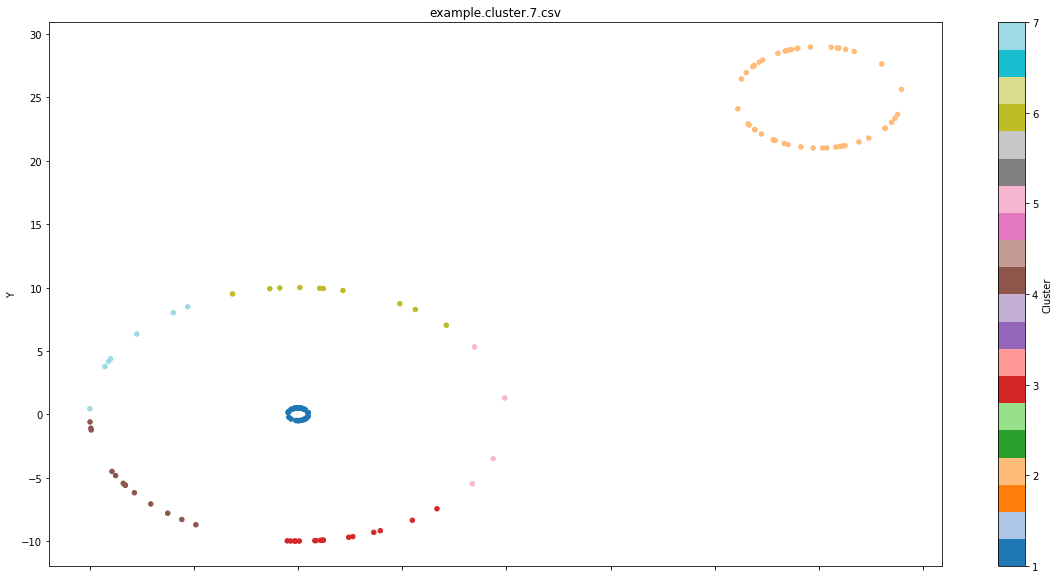

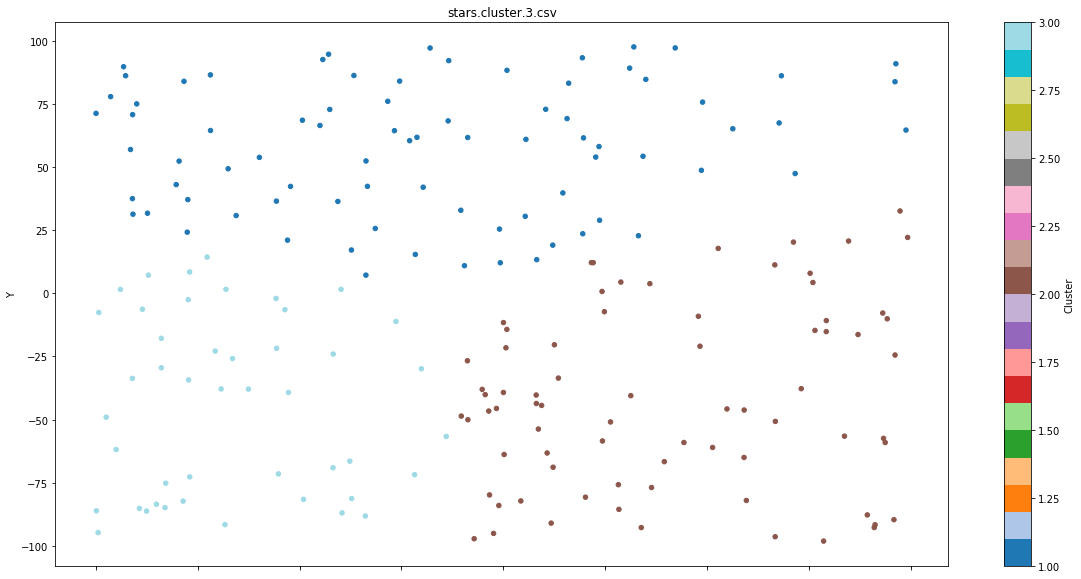

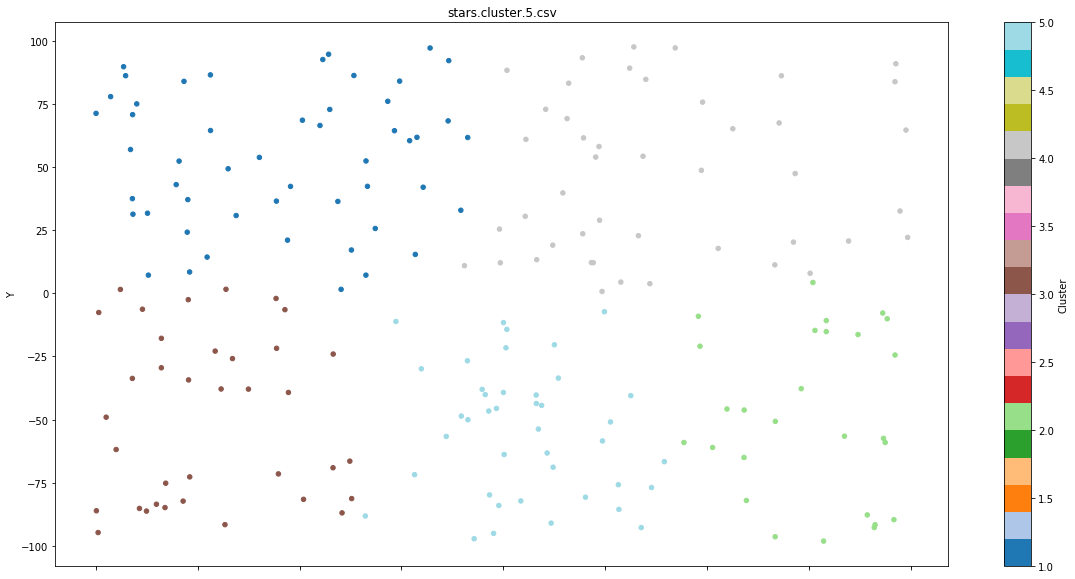

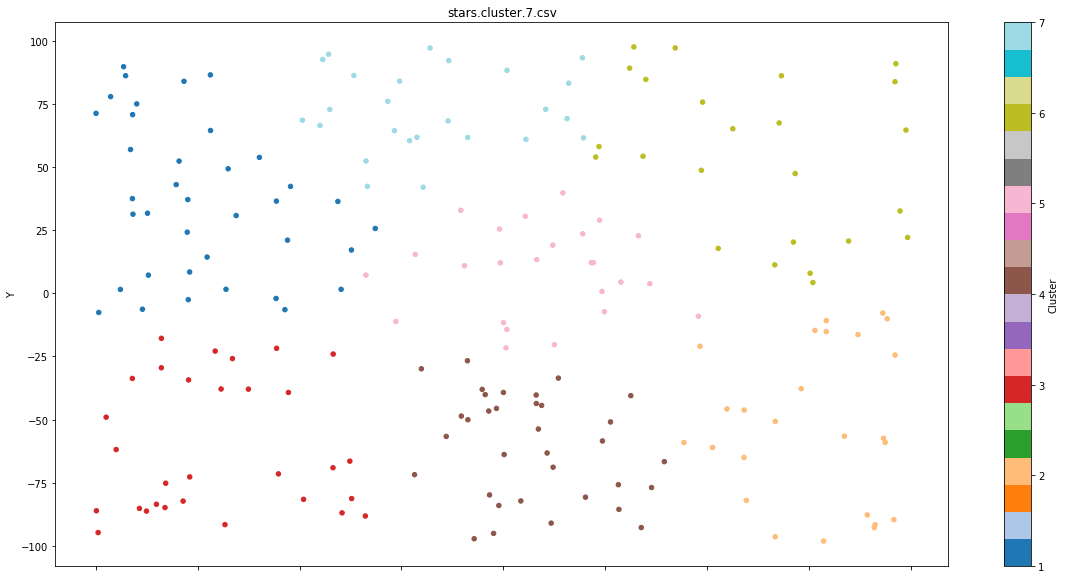

In [7]:
from glob import glob
for fileName in sorted(glob("*.cluster.*.csv")):
    plot(fileName)